In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv("C:\\Users\\Rooma\\Desktop\\New folder\\fraud_detection_dataset_original.csv")

df.head()
df.tail()

,account_open_date,age,location,occupation,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,...,number_of_delinquent_accounts,number_of_defaulted_accounts,earliest_credit_account,recent_trade_activity,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag
6995,4/10/2021,33,Boston,Consultant,14566,589.0,92,True,2,1.727134,...,3.0,2,11/29/2017,8/24/2024,1,True,True,True,False,False
6996,3/18/2022,66,Atlanta,Banker,8930,679.0,0,True,1,1.430593,...,0.0,0,3/20/2020,9/12/2024,0,False,False,True,False,False
6997,6/20/2024,68,Houston,Other,4501,321.0,58,True,1,1.750392,...,4.0,2,8/7/2015,2/11/2024,4,False,True,False,False,False
6998,10/4/2020,35,Chicago,Retail Worker,11938,729.0,0,False,1,1.518169,...,0.0,0,7/4/2019,4/17/2024,0,False,False,False,False,False
6999,6/13/2020,52,Seattle,Banker,7861,359.0,103,True,5,1.751935,...,4.0,1,5/14/2022,5/29/2024,3,True,True,True,False,False


In [57]:
# Sanity check
df.isnull().sum()/df.shape[0]*100
df.duplicated().sum()


0

In [58]:
# garbade valu check
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())

account_open_date
12/3/2020     12
8/29/2021     11
4/17/2021     10
7/27/2023     10
2/6/2021      10
              ..
12/14/2023     1
9/14/2020      1
12/2/2021      1
9/9/2022       1
9/15/2024      1
Name: count, Length: 1785, dtype: int64
location
Los Angeles      722
Boston           722
Dallas           719
Atlanta          717
Chicago          714
Seattle          712
Miami            696
San Francisco    693
New York         654
Houston          651
Name: count, dtype: int64
occupation
Banker                1341
Other                 1270
Teacher               1007
Accountant             887
Consultant             654
Artist                 405
Doctor                 381
Retail Worker          376
Lawyer                 239
Software Developer     237
Engineer               203
Name: count, dtype: int64
earliest_credit_account
2/16/2018    9
4/20/2020    8
7/7/2019     7
2/7/2019     7
1/15/2019    7
            ..
3/15/2022    1
1/6/2024     1
3/14/2020    1
2/23/2020    1
7/

In [59]:
df.describe()
df.describe(include="object")

,account_open_date,location,occupation,earliest_credit_account,recent_trade_activity,unusual_submission_pattern
count,7000,7000,7000,7000,7000,6090
unique,1785,10,11,3125,366,2
top,12/3/2020,Los Angeles,Banker,2/16/2018,11/17/2023,False
freq,12,722,1341,9,34,4822


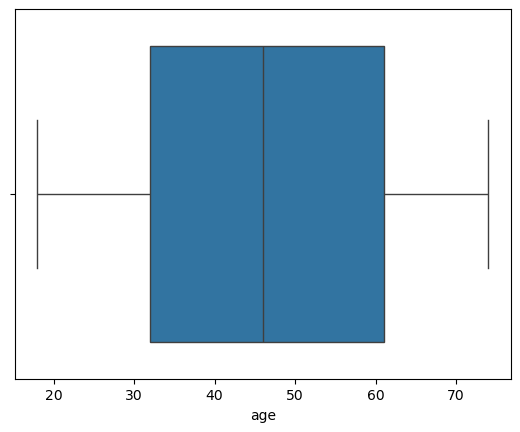

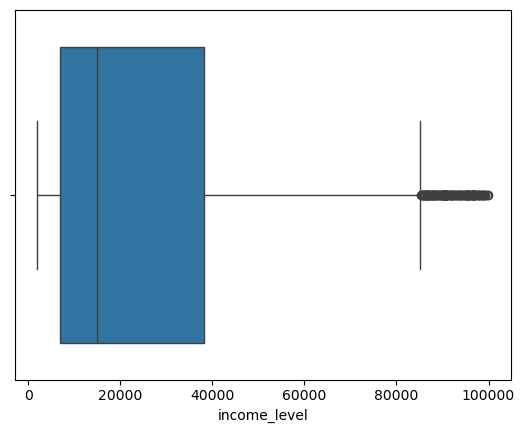

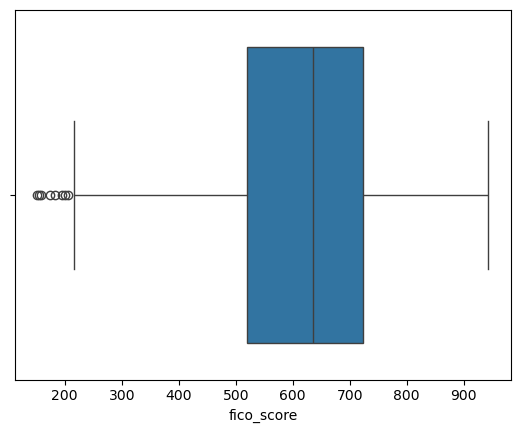

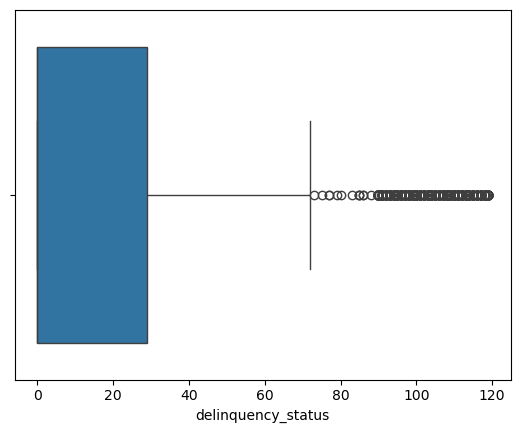

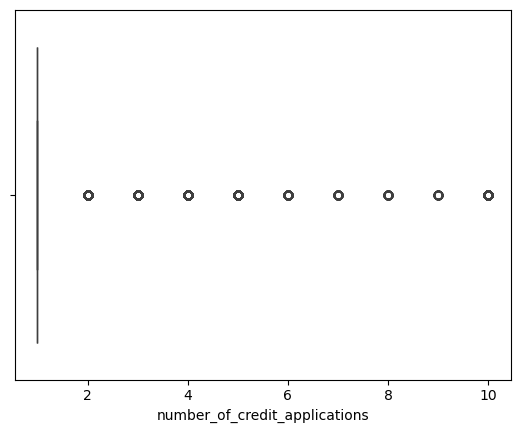

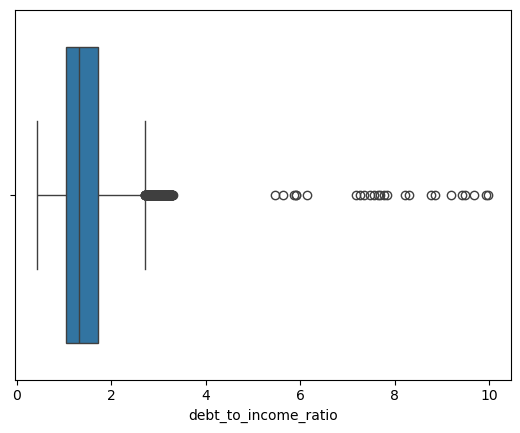

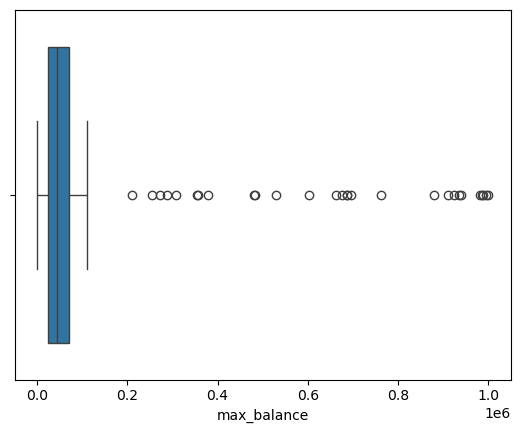

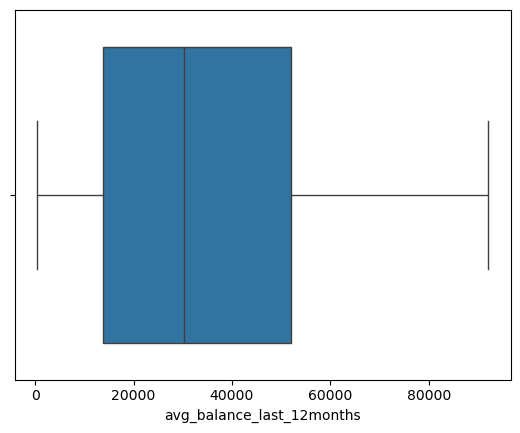

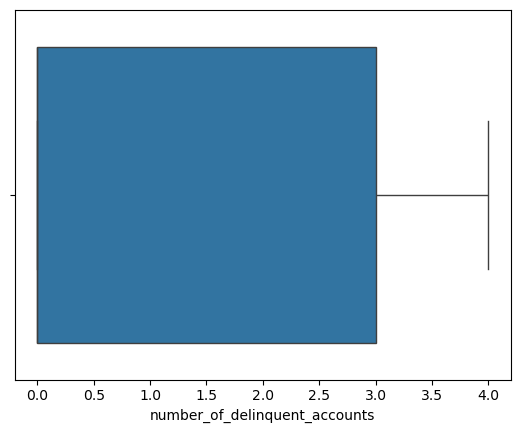

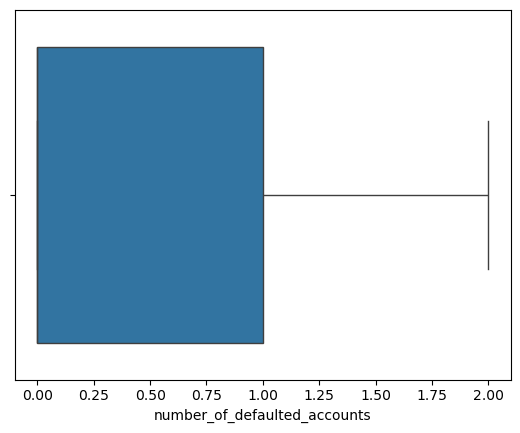

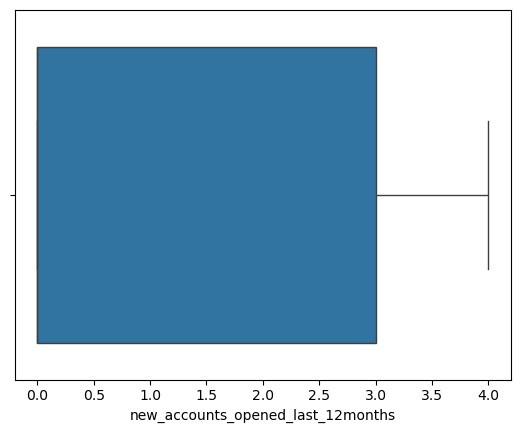

In [60]:
# Histrogram to understand the behaviour of the data set
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [61]:
# df.select_dtypes().columns

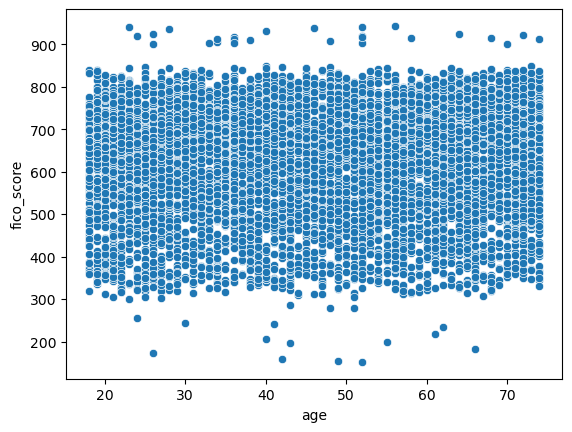

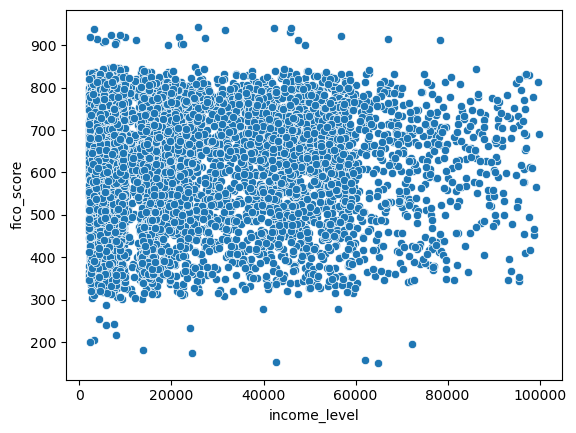

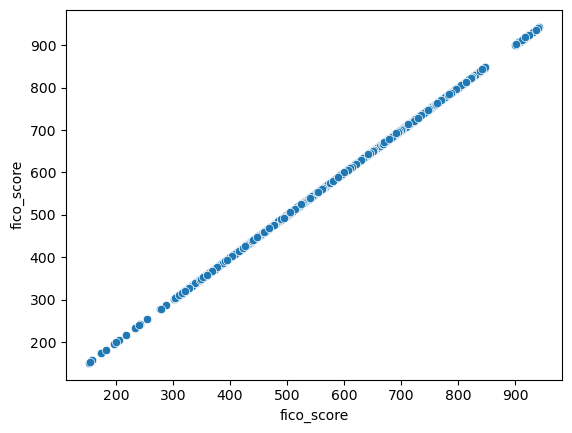

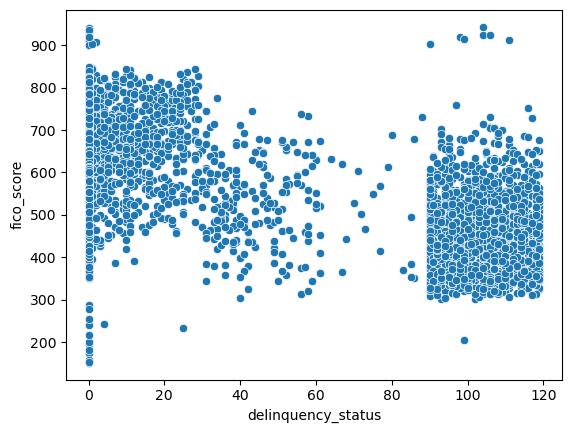

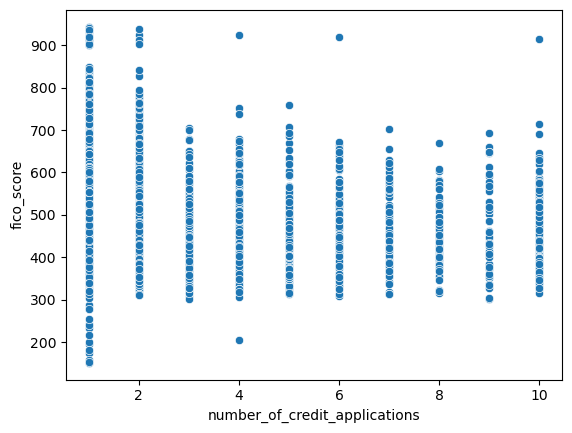

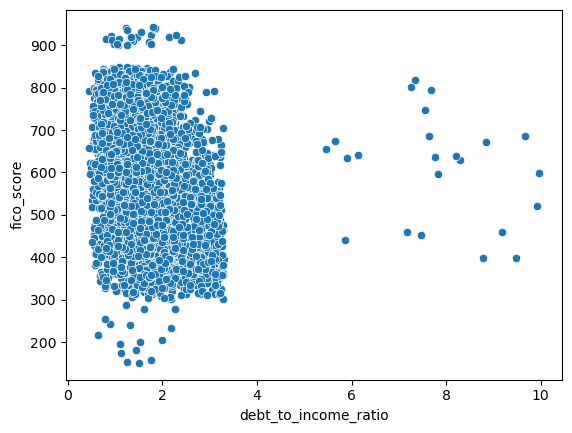

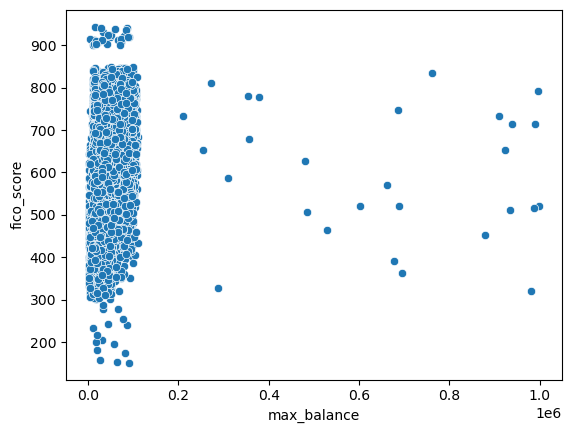

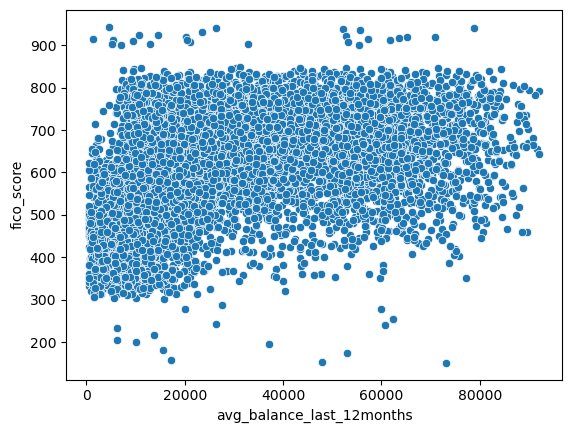

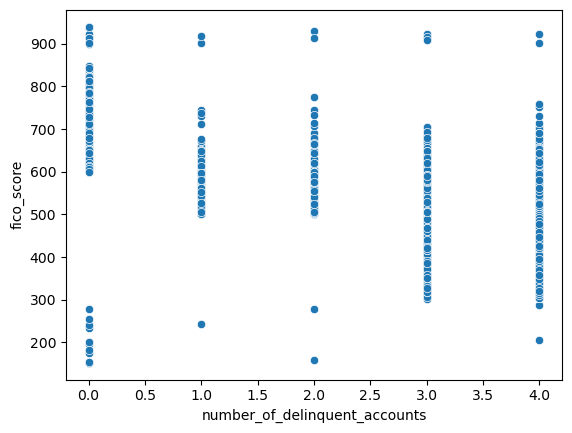

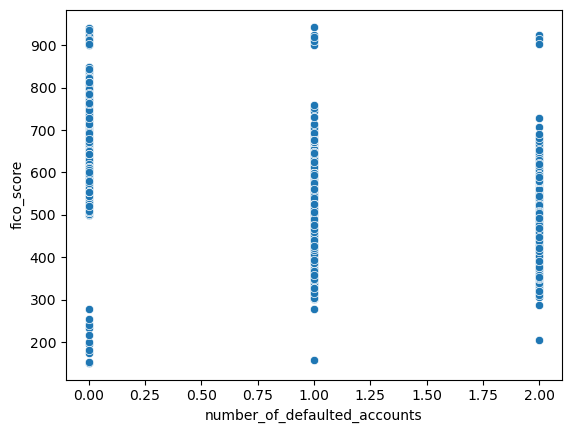

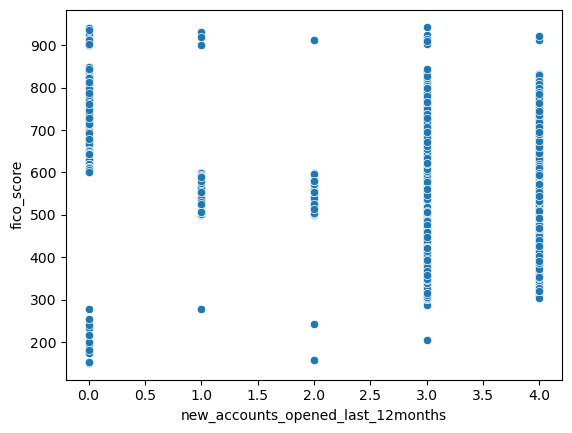

In [62]:
for i in ['age', 'income_level', 'fico_score', 'delinquency_status',
       'number_of_credit_applications', 'debt_to_income_ratio', 'max_balance',
       'avg_balance_last_12months', 'number_of_delinquent_accounts',
       'number_of_defaulted_accounts', 'new_accounts_opened_last_12months']:
    sns.scatterplot(data=df,x=i,y='fico_score')
    plt.show()

In [63]:
s=df.select_dtypes(include="number").corr()
print(s)

                                        age  income_level  fico_score  \
age                                1.000000     -0.000487    0.020115   
income_level                      -0.000487      1.000000    0.010501   
fico_score                         0.020115      0.010501    1.000000   
delinquency_status                -0.014651     -0.006782   -0.642420   
number_of_credit_applications     -0.001628      0.000423   -0.490110   
debt_to_income_ratio              -0.007112     -0.010662   -0.300410   
max_balance                       -0.005372      0.009126    0.156340   
avg_balance_last_12months          0.004718     -0.003865    0.399034   
number_of_delinquent_accounts     -0.015089     -0.006085   -0.820858   
number_of_defaulted_accounts      -0.016716     -0.005506   -0.735361   
new_accounts_opened_last_12months -0.006419     -0.009094   -0.675260   

                                   delinquency_status  \
age                                         -0.014651   
income_le

<Axes: >

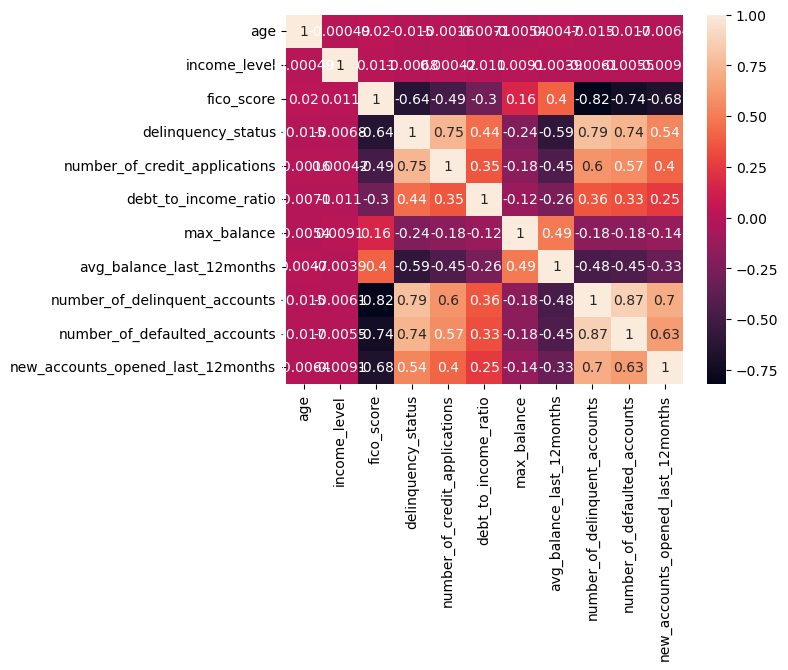

In [64]:
sns.heatmap(s,annot=True)

In [65]:
df.isnull().sum()

account_open_date                            0
age                                          0
location                                     0
occupation                                   0
income_level                                 0
fico_score                                 210
delinquency_status                           0
charge_off_status                            0
number_of_credit_applications                0
debt_to_income_ratio                         0
payment_methods_high_risk                    0
max_balance                                  0
avg_balance_last_12months                  350
number_of_delinquent_accounts              700
number_of_defaulted_accounts                 0
earliest_credit_account                      0
recent_trade_activity                        0
new_accounts_opened_last_12months            0
multiple_applications_short_time_period      0
unusual_submission_pattern                 910
applications_submitted_during_odd_hours      0
watchlist_bla

In [66]:
# Fill missing values for 'unusual_submission_pattern' using mode
df['unusual_submission_pattern'] = df['unusual_submission_pattern'].fillna(df['unusual_submission_pattern'].mode()[0])


C:\Users\Rooma\AppData\Local\Temp\ipykernel_7996\1644556398.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['unusual_submission_pattern'] = df['unusual_submission_pattern'].fillna(df['unusual_submission_pattern'].mode()[0])


In [67]:
df.isnull().sum()

account_open_date                            0
age                                          0
location                                     0
occupation                                   0
income_level                                 0
fico_score                                 210
delinquency_status                           0
charge_off_status                            0
number_of_credit_applications                0
debt_to_income_ratio                         0
payment_methods_high_risk                    0
max_balance                                  0
avg_balance_last_12months                  350
number_of_delinquent_accounts              700
number_of_defaulted_accounts                 0
earliest_credit_account                      0
recent_trade_activity                        0
new_accounts_opened_last_12months            0
multiple_applications_short_time_period      0
unusual_submission_pattern                   0
applications_submitted_during_odd_hours      0
watchlist_bla

In [68]:
from sklearn.impute import KNNImputer
numeric_columns = ['fico_score', 'avg_balance_last_12months', 'number_of_delinquent_accounts']
imputer = KNNImputer(n_neighbors=5)
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

In [69]:
df.isnull().sum()

account_open_date                          0
age                                        0
location                                   0
occupation                                 0
income_level                               0
fico_score                                 0
delinquency_status                         0
charge_off_status                          0
number_of_credit_applications              0
debt_to_income_ratio                       0
payment_methods_high_risk                  0
max_balance                                0
avg_balance_last_12months                  0
number_of_delinquent_accounts              0
number_of_defaulted_accounts               0
earliest_credit_account                    0
recent_trade_activity                      0
new_accounts_opened_last_12months          0
multiple_applications_short_time_period    0
unusual_submission_pattern                 0
applications_submitted_during_odd_hours    0
watchlist_blacklist_flag                   0
public_rec

In [70]:
# 1. Capping for `income_level`
income_upper_limit = df['income_level'].quantile(0.95)
df['income_level'] = df['income_level'].clip(upper=income_upper_limit)

# Optionally apply log transformation for `income_level`
df['income_level'] = np.log1p(df['income_level'])

# 2. Range correction for `fico_score`
df['fico_score'] = df['fico_score'].clip(lower=300, upper=850)

# Stricter capping for `delinquency_status`
delinquency_upper_limit = df['delinquency_status'].quantile(0.95)
df['delinquency_status'] = df['delinquency_status'].clip(upper=delinquency_upper_limit)

# # Optional log transformation to compress scale
# df['delinquency_status'] = np.log1p(df['delinquency_status'])


# 4. Capping for `number_of_credit_applications`
Q1_credit = df['number_of_credit_applications'].quantile(0.25)
Q3_credit = df['number_of_credit_applications'].quantile(0.75)
IQR_credit = Q3_credit - Q1_credit
credit_upper_limit = Q3_credit + 1.5 * IQR_credit
df['number_of_credit_applications'] = df['number_of_credit_applications'].clip(upper=credit_upper_limit)

# 5. Capping and log transformation for `debt_to_income_ratio`
debt_to_income_upper_limit = df['debt_to_income_ratio'].quantile(0.95)
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].clip(upper=debt_to_income_upper_limit)

# Optionally apply log transformation for `debt_to_income_ratio`
df['debt_to_income_ratio'] = np.log1p(df['debt_to_income_ratio'])

# 6. Capping for `max_balance`
max_balance_upper_limit = df['max_balance'].quantile(0.99)
df['max_balance'] = df['max_balance'].clip(upper=max_balance_upper_limit)

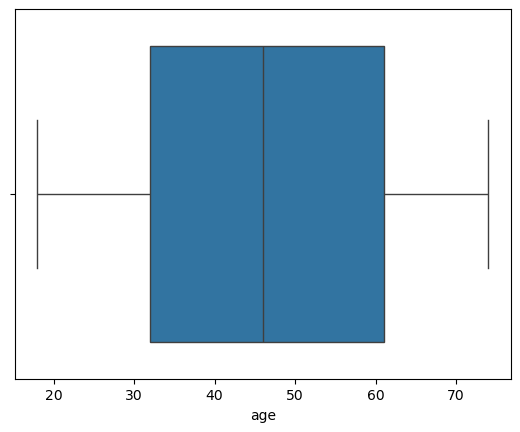

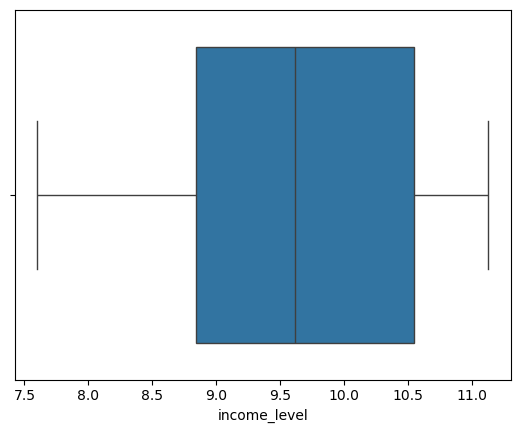

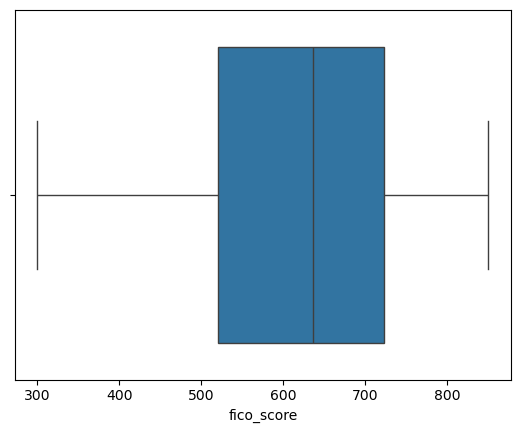

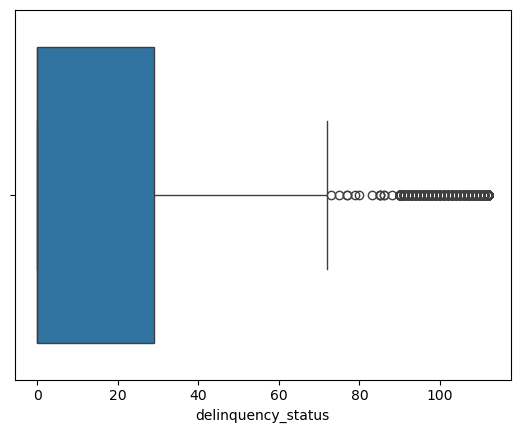

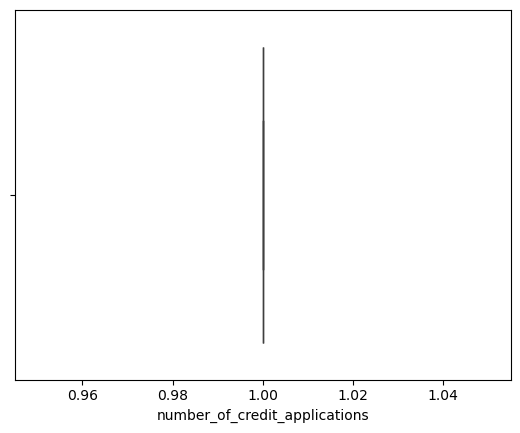

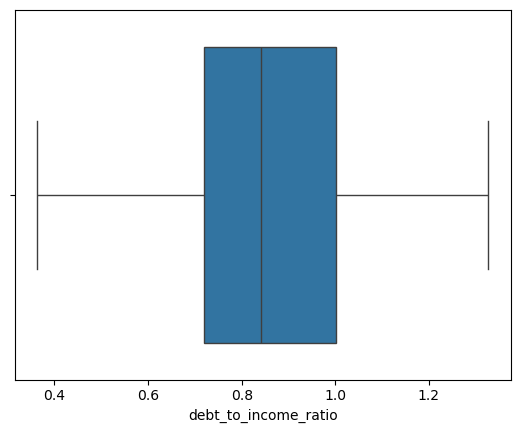

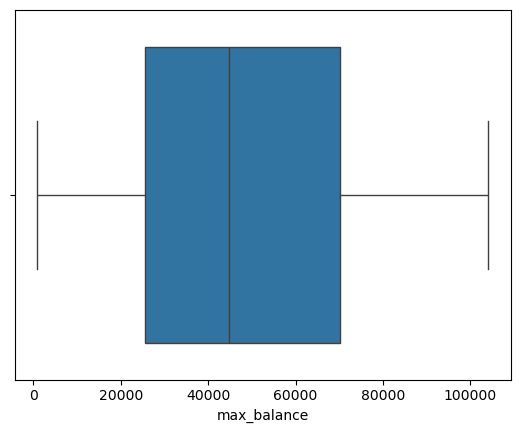

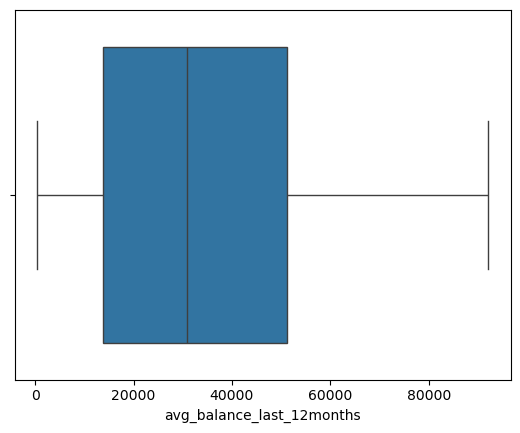

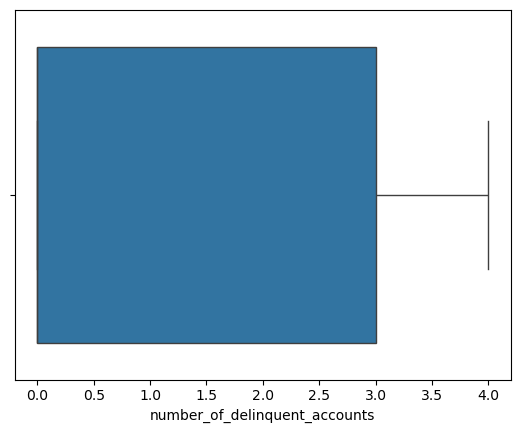

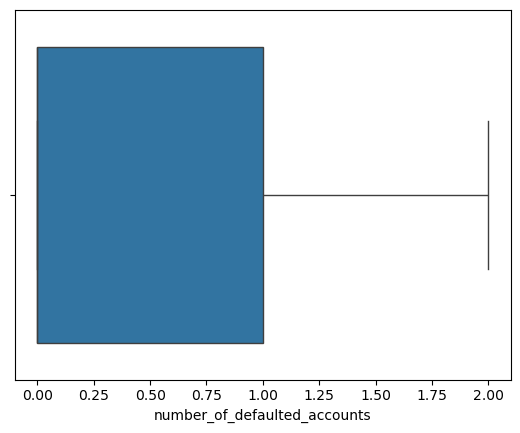

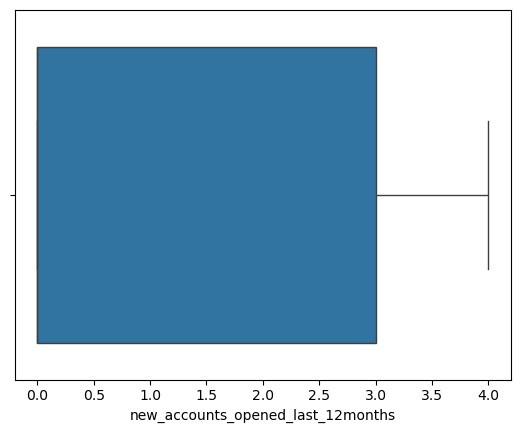

In [71]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [72]:
df.drop_duplicates()

,account_open_date,age,location,occupation,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,...,number_of_delinquent_accounts,number_of_defaulted_accounts,earliest_credit_account,recent_trade_activity,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag
0,11/9/2023,56,Los Angeles,Teacher,10.599132,424.0,108,True,1,1.326735,...,4.0,2,9/11/2018,3/7/2024,3,True,True,False,False,True
1,9/11/2022,69,New York,Engineer,7.626083,483.0,0,False,1,0.701854,...,3.0,2,3/8/2023,1/28/2024,3,False,True,False,False,False
2,7/12/2020,46,Miami,Engineer,11.131187,566.0,0,False,1,0.919735,...,2.0,0,4/26/2024,10/3/2024,2,False,False,False,False,False
3,8/13/2024,32,Houston,Banker,9.669915,511.2,97,True,1,1.326735,...,3.0,1,9/14/2023,10/14/2024,4,False,True,True,False,False
4,7/27/2024,60,Houston,Lawyer,9.056606,787.0,0,False,1,0.780416,...,0.0,0,11/8/2022,9/2/2024,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,4/10/2021,33,Boston,Consultant,9.586514,589.0,92,True,1,1.003251,...,3.0,2,11/29/2017,8/24/2024,1,True,True,True,False,False
6996,3/18/2022,66,Atlanta,Banker,9.097284,679.0,0,True,1,0.888135,...,0.0,0,3/20/2020,9/12/2024,0,False,False,True,False,False
6997,6/20/2024,68,Houston,Other,8.412277,321.0,58,True,1,1.011744,...,4.0,2,8/7/2015,2/11/2024,4,False,True,False,False,False
6998,10/4/2020,35,Chicago,Retail Worker,9.387566,729.0,0,False,1,0.923532,...,0.0,0,7/4/2019,4/17/2024,0,False,False,False,False,False


Encoding

In [73]:
df=pd.get_dummies(data=df,columns=["location","occupation"],drop_first=True)
df.head()

,account_open_date,age,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,...,occupation_Artist,occupation_Banker,occupation_Consultant,occupation_Doctor,occupation_Engineer,occupation_Lawyer,occupation_Other,occupation_Retail Worker,occupation_Software Developer,occupation_Teacher
0,11/9/2023,56,10.599132,424.0,108,True,1,1.326735,False,18209.383136,...,False,False,False,False,False,False,False,False,False,True
1,9/11/2022,69,7.626083,483.0,0,False,1,0.701854,False,33673.696504,...,False,False,False,False,True,False,False,False,False,False
2,7/12/2020,46,11.131187,566.0,0,False,1,0.919735,False,101918.174202,...,False,False,False,False,True,False,False,False,False,False
3,8/13/2024,32,9.669915,511.2,97,True,1,1.326735,False,9055.101659,...,False,True,False,False,False,False,False,False,False,False
4,7/27/2024,60,9.056606,787.0,0,False,1,0.780416,False,91682.852040,...,False,False,False,False,False,True,False,False,False,False


In [74]:
df.to_csv('updated_fraud_detection_dataset.csv', index=False)

In [75]:
df2 = pd.read_csv("C:\\Users\\Rooma\\Desktop\\New folder\\updated_fraud_detection_dataset.csv")

In [76]:
#df.isna().sum()

In [77]:
df.head()

,account_open_date,age,income_level,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,max_balance,...,occupation_Artist,occupation_Banker,occupation_Consultant,occupation_Doctor,occupation_Engineer,occupation_Lawyer,occupation_Other,occupation_Retail Worker,occupation_Software Developer,occupation_Teacher
0,11/9/2023,56,10.599132,424.0,108,True,1,1.326735,False,18209.383136,...,False,False,False,False,False,False,False,False,False,True
1,9/11/2022,69,7.626083,483.0,0,False,1,0.701854,False,33673.696504,...,False,False,False,False,True,False,False,False,False,False
2,7/12/2020,46,11.131187,566.0,0,False,1,0.919735,False,101918.174202,...,False,False,False,False,True,False,False,False,False,False
3,8/13/2024,32,9.669915,511.2,97,True,1,1.326735,False,9055.101659,...,False,True,False,False,False,False,False,False,False,False
4,7/27/2024,60,9.056606,787.0,0,False,1,0.780416,False,91682.852040,...,False,False,False,False,False,True,False,False,False,False


In [78]:
df.dtypes

account_open_date                           object
age                                          int64
income_level                               float64
fico_score                                 float64
delinquency_status                           int64
charge_off_status                             bool
number_of_credit_applications                int64
debt_to_income_ratio                       float64
payment_methods_high_risk                     bool
max_balance                                float64
avg_balance_last_12months                  float64
number_of_delinquent_accounts              float64
number_of_defaulted_accounts                 int64
earliest_credit_account                     object
recent_trade_activity                       object
new_accounts_opened_last_12months            int64
multiple_applications_short_time_period       bool
unusual_submission_pattern                    bool
applications_submitted_during_odd_hours       bool
watchlist_blacklist_flag       

In [79]:
df['recent_trade_activity'].value_counts()

recent_trade_activity
11/17/2023    34
9/25/2024     32
2/18/2024     30
6/22/2024     30
2/10/2024     30
              ..
5/27/2024     10
3/16/2024     10
5/17/2024      9
1/24/2024      9
12/7/2023      9
Name: count, Length: 366, dtype: int64

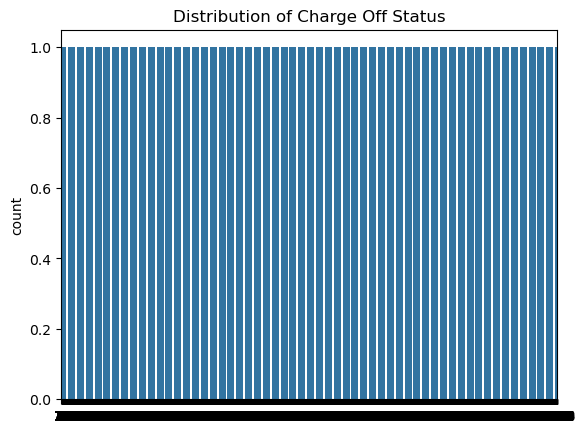

charge_off_status
False    0.739
True     0.261
Name: proportion, dtype: float64


In [80]:
# Plot target variable distribution
sns.countplot(df['charge_off_status'])
plt.title('Distribution of Charge Off Status')
plt.show()

# Check imbalance
print(df['charge_off_status'].value_counts(normalize=True))


In [81]:
#df.info()

In [82]:
# Filter numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Display the first few rows to verify
print(numerical_data.head().sum())

age                                     263.000000
income_level                             48.082922
fico_score                             2771.200000
delinquency_status                      205.000000
number_of_credit_applications             5.000000
debt_to_income_ratio                      5.055475
max_balance                          254539.207540
avg_balance_last_12months            170472.417601
number_of_delinquent_accounts            12.000000
number_of_defaulted_accounts              5.000000
new_accounts_opened_last_12months        12.000000
dtype: float64


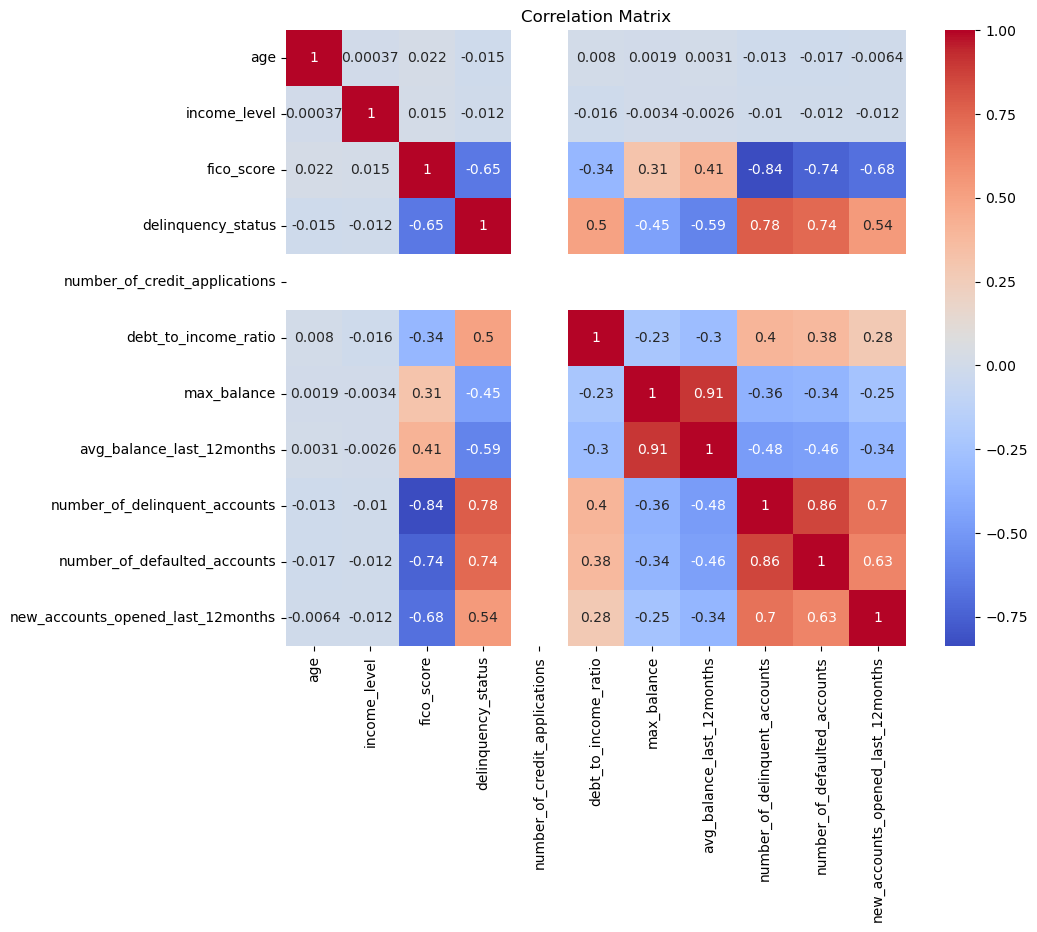

In [83]:
# Correlation matrix
corr = numerical_data.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [84]:
df.columns

Index(['account_open_date', 'age', 'income_level', 'fico_score',
       'delinquency_status', 'charge_off_status',
       'number_of_credit_applications', 'debt_to_income_ratio',
       'payment_methods_high_risk', 'max_balance', 'avg_balance_last_12months',
       'number_of_delinquent_accounts', 'number_of_defaulted_accounts',
       'earliest_credit_account', 'recent_trade_activity',
       'new_accounts_opened_last_12months',
       'multiple_applications_short_time_period', 'unusual_submission_pattern',
       'applications_submitted_during_odd_hours', 'watchlist_blacklist_flag',
       'public_records_flag', 'location_Boston', 'location_Chicago',
       'location_Dallas', 'location_Houston', 'location_Los Angeles',
       'location_Miami', 'location_New York', 'location_San Francisco',
       'location_Seattle', 'occupation_Artist', 'occupation_Banker',
       'occupation_Consultant', 'occupation_Doctor', 'occupation_Engineer',
       'occupation_Lawyer', 'occupation_Other', 'occ

In [85]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Select only boolean (or binary) features
bool_features = [col for col in df.columns if df[col].nunique() == 2]

# Ensure target is also binary or categorical
y = df['charge_off_status']

# Perform Chi-Square test for boolean features
chi_scores, p_values = chi2(df[bool_features], y)

# Create a summary DataFrame
chi2_results = pd.DataFrame({
    'Feature': bool_features,
    'Chi-Square': chi_scores,
    'P-Value': p_values
})

# Sort by importance (Chi-Square score)
print(chi2_results.sort_values(by='Chi-Square', ascending=False))

                                    Feature   Chi-Square        P-Value
0                         charge_off_status  5173.000000   0.000000e+00
3                unusual_submission_pattern  1010.181596  1.099424e-221
1                 payment_methods_high_risk   701.575966  1.358315e-154
2   multiple_applications_short_time_period   480.259534  1.876159e-106
4   applications_submitted_during_odd_hours   248.613332   5.208936e-56
6                       public_records_flag    60.310978   8.099443e-15
5                  watchlist_blacklist_flag     7.349770   6.707132e-03
15                         location_Seattle     2.146221   1.429213e-01
13                        location_New York     2.107814   1.465486e-01
21                        occupation_Lawyer     1.908228   1.671602e-01
23                 occupation_Retail Worker     1.709959   1.909907e-01
10                         location_Houston     1.327559   2.492399e-01
9                           location_Dallas     0.819255   3.653

# feature Engineering

In [86]:
from datetime import datetime

# Convert dates to datetime
df['account_open_date'] = pd.to_datetime(df['account_open_date'])
df['earliest_credit_account'] = pd.to_datetime(df['earliest_credit_account'])
df['recent_trade_activity'] = pd.to_datetime(df['recent_trade_activity'])

# Account age
df['account_age'] = (datetime.now() - df['account_open_date']).dt.days

# Credit tenure
df['credit_tenure'] = (df['recent_trade_activity'] - df['earliest_credit_account']).dt.days

In [87]:
df['credit_tenure'].dtype

dtype('int64')

In [88]:
# Correlation coefficients
correlations = df[['account_age', 'credit_tenure', 'charge_off_status']].corr()
print(correlations)

                   account_age  credit_tenure  charge_off_status
account_age           1.000000      -0.001731          -0.021486
credit_tenure        -0.001731       1.000000           0.005931
charge_off_status    -0.021486       0.005931           1.000000


* no significant linear relationship between credit tenture, account age and charge off status

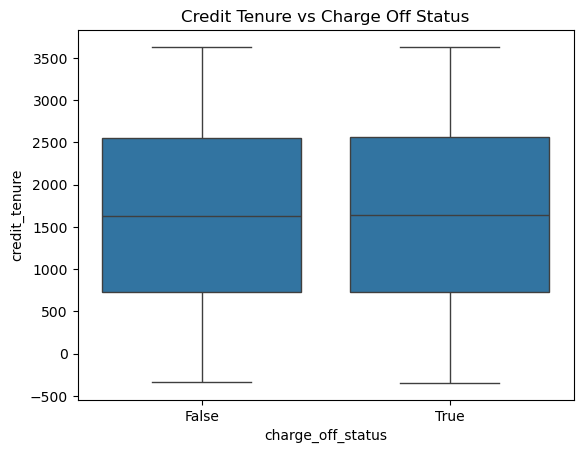

In [89]:
sns.boxplot(x='charge_off_status', y='credit_tenure', data=df)
plt.title('Credit Tenure vs Charge Off Status')
plt.show()

In [90]:
df.dtypes

account_open_date                          datetime64[ns]
age                                                 int64
income_level                                      float64
fico_score                                        float64
delinquency_status                                  int64
charge_off_status                                    bool
number_of_credit_applications                       int64
debt_to_income_ratio                              float64
payment_methods_high_risk                            bool
max_balance                                       float64
avg_balance_last_12months                         float64
number_of_delinquent_accounts                     float64
number_of_defaulted_accounts                        int64
earliest_credit_account                    datetime64[ns]
recent_trade_activity                      datetime64[ns]
new_accounts_opened_last_12months                   int64
multiple_applications_short_time_period              bool
unusual_submis

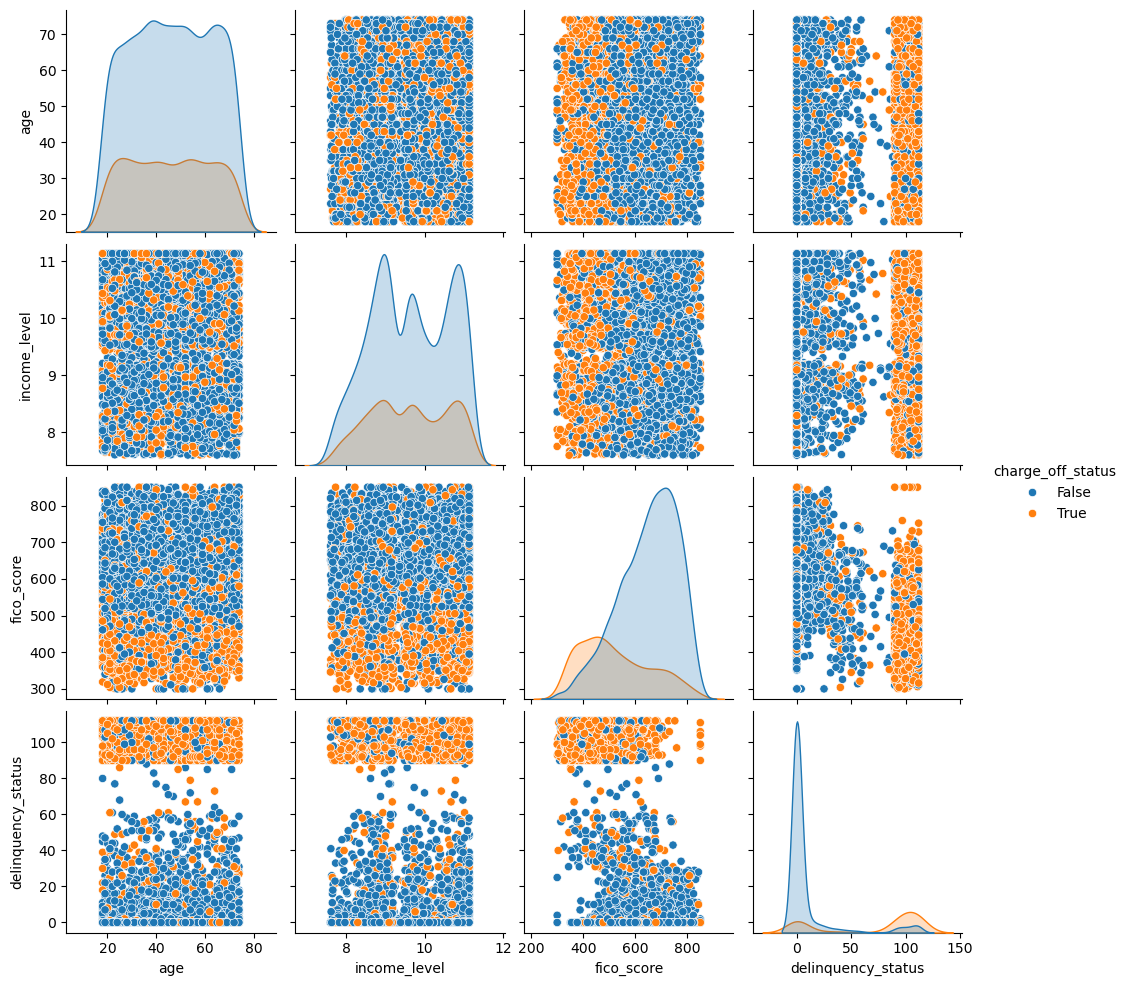

In [91]:
sns.pairplot(df,
             vars=['age', 'income_level', 'fico_score',
       'delinquency_status'],
            hue='charge_off_status')
plt.show()

* fico_score appears to be an important feature for predicting charge-offs, as higher scores correlate with fewer charge-offs.
income_level and age are not strong individual predictors based on this visualization but might be useful in combination with other features
* The delinquency_status feature shows that higher delinquency levels are more correlated with charge-offs (charge_off_status=True).
Most customers have low delinquency statuses (close to 0), with fewer cases showing higher delinquency..

In [92]:
df.columns

Index(['account_open_date', 'age', 'income_level', 'fico_score',
       'delinquency_status', 'charge_off_status',
       'number_of_credit_applications', 'debt_to_income_ratio',
       'payment_methods_high_risk', 'max_balance', 'avg_balance_last_12months',
       'number_of_delinquent_accounts', 'number_of_defaulted_accounts',
       'earliest_credit_account', 'recent_trade_activity',
       'new_accounts_opened_last_12months',
       'multiple_applications_short_time_period', 'unusual_submission_pattern',
       'applications_submitted_during_odd_hours', 'watchlist_blacklist_flag',
       'public_records_flag', 'location_Boston', 'location_Chicago',
       'location_Dallas', 'location_Houston', 'location_Los Angeles',
       'location_Miami', 'location_New York', 'location_San Francisco',
       'location_Seattle', 'occupation_Artist', 'occupation_Banker',
       'occupation_Consultant', 'occupation_Doctor', 'occupation_Engineer',
       'occupation_Lawyer', 'occupation_Other', 'occ

In [93]:
'''from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['debt_to_income_ratio', 'Max_balance', 'Avg_balance_last_12months']])

# Add scaled features back to the DataFrame
df[['Debt_to_Income_Ratio', 'Max_balance', 'Avg_balance_last_12months']] = scaled_features'''

"from sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\nscaled_features = scaler.fit_transform(df[['debt_to_income_ratio', 'Max_balance', 'Avg_balance_last_12months']])\n\n# Add scaled features back to the DataFrame\ndf[['Debt_to_Income_Ratio', 'Max_balance', 'Avg_balance_last_12months']] = scaled_features"

In [94]:
df = df.drop(['location_Boston', 'location_Chicago',
       'location_Dallas', 'location_Houston', 'location_Los Angeles',
       'location_Miami', 'location_New York', 'location_San Francisco',
       'location_Seattle', 'occupation_Artist', 'occupation_Banker',
       'occupation_Consultant', 'occupation_Doctor', 'occupation_Engineer',
       'occupation_Lawyer', 'occupation_Other', 'occupation_Retail Worker',
       'occupation_Software Developer', 'occupation_Teacher', 'account_age',
              'account_open_date', 'age', 'income_level','earliest_credit_account', 
              'recent_trade_activity'
             ], axis =1)

In [95]:
df['composite_balance'] = (df['max_balance'] + df['avg_balance_last_12months']) / 2

In [96]:
df = df.drop(['max_balance', 'avg_balance_last_12months'], axis=1)

In [97]:
df.columns

Index(['fico_score', 'delinquency_status', 'charge_off_status',
       'number_of_credit_applications', 'debt_to_income_ratio',
       'payment_methods_high_risk', 'number_of_delinquent_accounts',
       'number_of_defaulted_accounts', 'new_accounts_opened_last_12months',
       'multiple_applications_short_time_period', 'unusual_submission_pattern',
       'applications_submitted_during_odd_hours', 'watchlist_blacklist_flag',
       'public_records_flag', 'credit_tenure', 'composite_balance'],
      dtype='object')

#  Model training

In [106]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
X = df.drop(columns = 'charge_off_status')
y = df['charge_off_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model_1 = LogisticRegression(class_weight='balanced', random_state=42)
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier(class_weight='balanced', random_state=42)
model_4 = XGBClassifier()
model_5 = LGBMClassifier()

* used 5 models to find the best performing model

In [ ]:
model_1.fit(X_train, y_train)
pred = model_1.predict(X_test)
accuracy_score(y_test, pred)

0.8614285714285714

In [ ]:
model_2.fit(X_train, y_train)
pred = model_2.predict(X_test)
accuracy_score(y_test, pred)

0.7814285714285715

In [ ]:
model_3.fit(X_train, y_train)
pred = model_2.predict(X_test)
accuracy_score(y_test, pred)

0.7814285714285715

In [ ]:
model_4.fit(X_train, y_train)
pred = model_2.predict(X_test)
accuracy_score(y_test, pred)

0.7814285714285715

In [ ]:
model_5.fit(X_train, y_train)
pred = model_2.predict(X_test)
accuracy_score(y_test, pred)

[LightGBM] [Info] Number of positive: 1478, number of negative: 4122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263929 -> initscore=-1.025649
[LightGBM] [Info] Start training from score -1.025649


0.7814285714285715

* model_1 is with best accuracy score

In [ ]:
test_probs = model_1.predict_proba(X_test)[:, 1]

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:")
print(classification_report(y_test, model_1.predict(X_test)))

roc_auc = roc_auc_score(y_test, test_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.91      0.91      1051
        True       0.73      0.71      0.72       349

    accuracy                           0.86      1400
   macro avg       0.82      0.81      0.81      1400
weighted avg       0.86      0.86      0.86      1400

ROC-AUC Score: 0.82


In [ ]:
# Retrain the model on the entire dataset
final_model = LogisticRegression(class_weight='balanced', random_state=42)
final_model.fit(X, y)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Predict probabilities for the entire dataset
all_probs = final_model.predict_proba(X)[:, 1]

# Convert probabilities to risk scores
risk_scores = all_probs * 1000

# Add risk scores to the original dataset
df['Risk_Score'] = risk_scores

# Save results to a CSV file
df.to_csv('credit_risk_scores.csv', index=False)

print("Risk scores saved to 'credit_risk_scores.csv'.")

Risk scores saved to 'credit_risk_scores.csv'.


In [ ]:
df.head()

,fico_score,delinquency_status,charge_off_status,number_of_credit_applications,debt_to_income_ratio,payment_methods_high_risk,number_of_delinquent_accounts,number_of_defaulted_accounts,new_accounts_opened_last_12months,multiple_applications_short_time_period,unusual_submission_pattern,applications_submitted_during_odd_hours,watchlist_blacklist_flag,public_records_flag,credit_tenure,composite_balance,Risk_Score
0,424.0,108,True,1,1.326735,False,4.0,2,3,True,True,False,False,True,2004,11267.156904,925.609741
1,483.0,0,False,1,0.701854,False,3.0,2,3,False,True,False,False,False,326,27700.145210,319.236305
2,566.0,0,False,1,0.919735,False,2.0,0,2,False,False,False,False,False,160,82924.138228,271.670565
3,511.2,97,True,1,1.326735,False,3.0,1,4,False,True,True,False,False,396,6044.252700,895.510189
4,787.0,0,False,1,0.780416,False,0.0,0,0,True,False,True,False,False,664,84570.119528,208.923487


In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute coefficient value to see which features have the largest impact
coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('abs_coefficient', ascending=False)

print(coefficients)

                                    Feature  Coefficient  abs_coefficient
1                        delinquency_status     0.026599         0.026599
0                                fico_score    -0.002669         0.002669
5             number_of_delinquent_accounts     0.000764         0.000764
7         new_accounts_opened_last_12months     0.000633         0.000633
6              number_of_defaulted_accounts     0.000333         0.000333
4                 payment_methods_high_risk     0.000160         0.000160
9                unusual_submission_pattern     0.000157         0.000157
8   multiple_applications_short_time_period     0.000140         0.000140
3                      debt_to_income_ratio     0.000121         0.000121
10  applications_submitted_during_odd_hours     0.000121         0.000121
13                            credit_tenure    -0.000075         0.000075
2             number_of_credit_applications     0.000069         0.000069
12                      public_records

* Features with high absolute coefficients (positive or negative) are the most important in determining the target variable (e.g., charge-off).
You can interpret the coefficients: For example, if a feature like Debt_to_income_ratio has a positive coefficient, it means higher debt-to-income ratios increase the likelihood of a charge-off (fraud).